<img style="float: right; margin: 45px 22px 22px 22px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="600" height="960" /> 
    
    
# <font color='navy'> Quantitative Finance

**Students:**
    
    Espinosa García, Lyha 
    Flores Ortiz, Moisés
    Lares Barragán, Andrés
    Rosas Medellín, Miriam Eunice
    Vázquez Vargas, Ana Cristina
    
**Date:**

    December 4th, 2021

**Professor:** 	
    
    José Mario Zárate Carbajal

    
# Option Greeks

In [217]:
import numpy as np, scipy.stats as si, matplotlib.pyplot as plt

In [155]:
class Option:
    
    # Definir y asignar los atributos del objeto.
    def __init__(self, tipo:str, S:float, K:float, r:float, sigma:float, T: int):
        if tipo is None:
            raise ValueError("Defina un tipo de opción (call/put).")
        self.tipo = tipo
        self.S = S
        self.K = K
        self.r = r
        self.sigma = sigma
        self.T = T
        self.d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
        self.d2 = (np.log(self.S / self.K) + (self.r - 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
    
    def get_fv(self)->float:
        if self.tipo=='call':
            self.fv = self.S * si.norm.cdf(self.d1, 0.0, 1.0) - self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2, 0.0, 1.0)
            return self.fv
        elif self.tipo=='put':
            self.fv = self.K*np.exp(-self.r*self.T)*si.norm.cdf(-self.d2, 0.0, 1.0) - self.S*si.norm.cdf(-self.d1, 0.0, 1.0)
            return self.fv
        
    @staticmethod #Alternative Constructor
    def Options(tipo, S, K, r, sigma, T):
        return Option(tipo, S, K, r, sigma, T)

In [250]:
S = np.ones(11)*52 #np.arange(40,62,2)
tipo=['call']*11
K= np.ones(11)*50
T= np.arange(5.5,0,-0.5) #np.ones(11)
r= np.ones(11)*.05
vol= np.ones(11)*0.257841618330987

In [251]:
options = [Option(tipo[i],S[i],K[i],r[i],vol[i],T[i]) for i in range(len(S))]

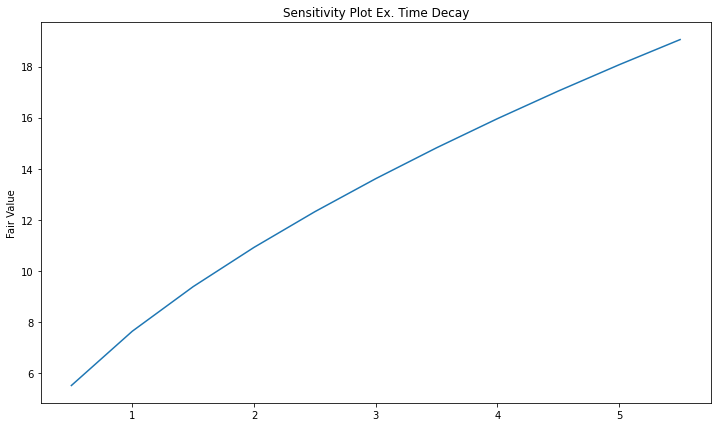

In [252]:
FVs = [options[j].get_fv() for j in range(len(options))]
plt.figure(figsize=(12, 7))
plt.title("Sensitivity Plot Ex. Time Decay")
plt.plot(T, FVs)
plt.ylabel("Fair Value")
plt.show()

In [253]:
T

array([5.5, 5. , 4.5, 4. , 3.5, 3. , 2.5, 2. , 1.5, 1. , 0.5])